First create folder structure to support Keras labeling, before starting anything else

In [37]:
"""import glob
import os
import shutil

path = "./VD_dataset2/"
inputs = glob.glob(dir + '*_input.png')
targets = glob.glob(dir + '*_target.png')

if not os.path.exists(path + "inputs"):
    os.makedirs(path + "inputs")
    
if not os.path.exists(path + "targets"):
    os.makedirs(path + "targets")

for input in inputs:
    shutil.move(input, path + "inputs/")
    
for target in targets:
    shutil.move(target, path + "targets/")"""

In [1]:
import glob
import os
import cv2
import numpy as np

path = "./VD_dataset2/"

inputs = [cv2.imread(img) for img in glob.glob(os.path.join(path,"*input.png"))]

targets = [cv2.imread(img) for img in glob.glob(os.path.join(path,"*target.png"))]


In [2]:
inputs = np.array(inputs)
inputs = inputs / 255  # normalize


In [3]:
kalle =inputs.reshape(len(inputs), np.prod(inputs.shape[1:]))

In [4]:
kalle.shape


(1207, 786432)

In [5]:
from matplotlib import pyplot as plt


In [6]:
inputs = kalle
targets = np.array(targets)
targets = targets / 255
targets =targets.reshape(len(targets), np.prod(targets.shape[1:]))

In [7]:
P = int(len(inputs)* 0.8) # size of training set
train_I = inputs[:P]
train_T = targets[:P]

test_I = inputs[P:]
test_T = targets[P:]


In [7]:
print(train_T)

[array([[[ 91, 158, 181],
        [ 91, 157, 180],
        [ 91, 157, 180],
        ...,
        [ 94, 156, 177],
        [ 94, 155, 177],
        [ 93, 157, 178]],

       [[ 92, 157, 179],
        [ 91, 157, 180],
        [ 91, 158, 180],
        ...,
        [ 95, 154, 175],
        [ 93, 156, 177],
        [ 95, 155, 175]],

       [[ 91, 158, 181],
        [ 91, 157, 181],
        [ 91, 157, 180],
        ...,
        [ 94, 155, 176],
        [ 94, 156, 176],
        [ 94, 155, 176]],

       ...,

       [[130, 114, 112],
        [137, 128, 120],
        [134, 135, 124],
        ...,
        [128, 128, 112],
        [145, 120,  92],
        [127, 131, 115]],

       [[103, 127, 147],
        [117, 154, 149],
        [104, 155, 157],
        ...,
        [158, 101,  95],
        [156, 117, 103],
        [158, 100,  93]],

       [[109, 127, 153],
        [132, 145, 145],
        [108, 125, 143],
        ...,
        [163, 118,  73],
        [138, 111,  80],
        [124, 114, 107]

In [ ]:

train_I = tf.convert_to_tensor(train_I)
train_T = tf.convert_to_tensor(train_T)

test_I = tf.convert_to_tensor(test_I)
test_T = tf.convert_to_tensor(test_T)

In [16]:
import tensorflow as tf
import numpy as np

stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
])
stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(512 * 512 * 3),
    tf.keras.layers.Reshape([512 * 512 * 3])
])




stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss="mse", optimizer="nadam")
history = stacked_ae.fit(train_I, train_T, epochs=10,
                         validation_data=(test_I, test_T))

Epoch 1/10
31/31 [==============================] - 87s 2s/step - loss: 0.2744 - val_loss: 0.1140
Epoch 2/10
31/31 [==============================] - 59s 2s/step - loss: 0.0843 - val_loss: 0.0966
Epoch 3/10
31/31 [==============================] - 55s 2s/step - loss: 0.0795 - val_loss: 0.1044
Epoch 4/10
31/31 [==============================] - 54s 2s/step - loss: 0.0764 - val_loss: 0.0975
Epoch 5/10
31/31 [==============================] - 54s 2s/step - loss: 0.0836 - val_loss: 0.1006
Epoch 6/10
31/31 [==============================] - 54s 2s/step - loss: 0.0820 - val_loss: 0.1225
Epoch 7/10
31/31 [==============================] - 54s 2s/step - loss: 0.0845 - val_loss: 0.0907
Epoch 8/10
31/31 [==============================] - 54s 2s/step - loss: 0.0777 - val_loss: 0.0888
Epoch 9/10
31/31 [==============================] - 54s 2s/step - loss: 0.0870 - val_loss: 0.1041
Epoch 10/10
31/31 [==============================] - 54s 2s/step - loss: 0.0811 - val_loss: 0.1041


In [19]:
train_I.shape

(965, 786432)

In [22]:
result = stacked_ae.predict(inputs[:1])
results = []
for resul in result:
    results.append(resul.reshape(512,512,3))

1/1 [==============================] - 0s 94ms/step


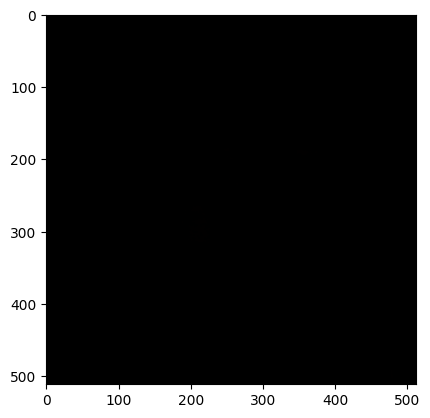

In [23]:
from matplotlib import pyplot as plt
plt.imshow(results[0].astype(int))


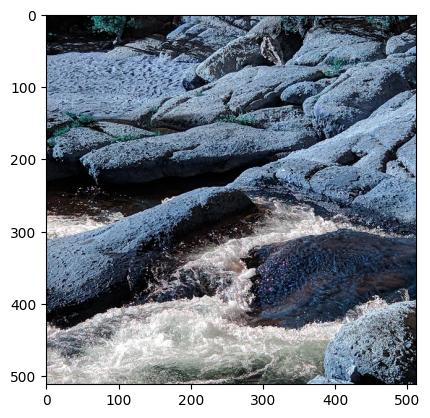

In [24]:
plt.imshow(inputs[1].reshape(512,512,3))

Get the dataset and separate it by inputs and targets, also represent the images as matrix of RGB values

In [40]:
dir = "./VD_dataset2/"
data = tf.keras.utils.image_dataset_from_directory(dir, labels='inferred', validation_split=0.2, subset="training", seed=42)

Found 2414 files belonging to 2 classes.
Using 1932 files for training.


In [48]:
type(data.as_numpy_iterator())

TypeError: '_NumpyIterator' object is not subscriptable

In [69]:
history= autoencoder.fit(inputs, targets, epochs=500, verbose=False)
codings = encoder.predict(inputs)

16/16 [==============================] - 2s 19ms/step


In [42]:
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>